In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sys
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\CT")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
from plots import *
import os
import utils
import h5py
from scipy.optimize import curve_fit
from PIL import Image

import scipy.ndimage as nd

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.patheffects as PathEffects

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [134]:
root = r"C:\Users\Bruker\Documents\MAX4DCT"
choose_formatter(False)

In [167]:
x1, x2 = 218, 666
y1, y2 = 124, 388
z1, z2 = 124, 388

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55_2bin",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_0_1_fdk",
    "Rec_0_1_fdk_enhanced_442256256_complete", #RSD: Simulated or complete dataset?
]
keys = [
    "gt",
    "13",
    "13_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,448
        y1, y2 = 0,264
        z1, z2 = 0,264
    else:
        x1, x2 = 218, 666
        y1, y2 = 124, 388
        z1, z2 = 124, 388

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))

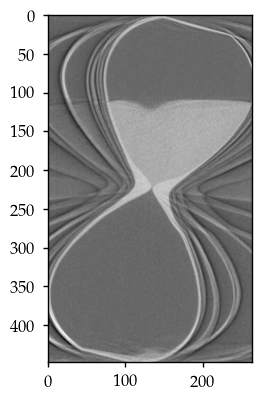

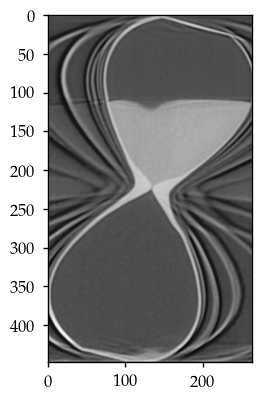

In [168]:
plt.imshow(crossections["13"][:,:,158], cmap="gray")
plt.show()

plt.imshow(crossections["13_enhanced"][:,:,158], cmap="gray")
plt.show()


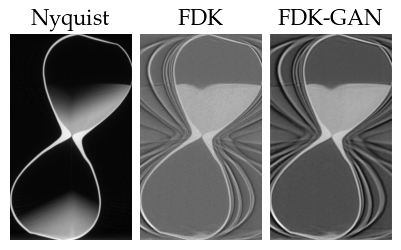

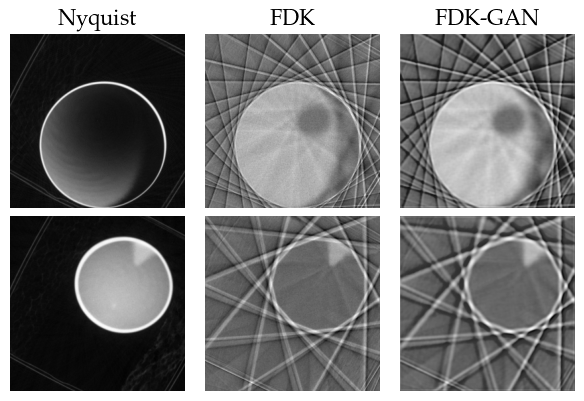

In [159]:
x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

grid_slices = []

hourglass_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
hourglass_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
hourglass_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

# grid_slices.append(hourglass_full)
# grid_slices.append(hourglass_fdk)
# grid_slices.append(hourglass_fdk_gan)

x1,x2, = 112, 113
y1,y2 = 0,264
z1,z2 = 0,264

crossection_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
crossection_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
crossection_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(crossection_full)
grid_slices.append(crossection_fdk)
grid_slices.append(crossection_fdk_gan)


x1,x2, = 425, 426
y1,y2 = 0,264
z1,z2 = 0,264

bottom_full = np.squeeze(crossections["gt"][x1:x2, y1:y2, z1:z2])
bottom_fdk = np.squeeze(crossections["13"][x1:x2, y1:y2, z1:z2])
bottom_fdk_gan = np.squeeze(crossections["13_enhanced"][x1:x2, y1:y2, z1:z2])

grid_slices.append(bottom_full)
grid_slices.append(bottom_fdk)
grid_slices.append(bottom_fdk_gan)



plot_slice_grid([hourglass_full, hourglass_fdk, hourglass_fdk_gan], ["Nyquist", "FDK", "FDK-GAN", "Upper", "", "", "Lower", "", ""], 
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=False,
    savefile="Hourglass4D_binned_temporal",
    fs =(2,1))

plot_slice_grid(grid_slices, ["Nyquist", "FDK", "FDK-GAN", "", "", "", "", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle=None,
    savefig=False,
    savefile="Hourglass4D_binned_crossections",
    fs =(1,1.5))

FDK
0.00015793701 0.36415166
FDK-GAN
8.319641e-05 0.39063832


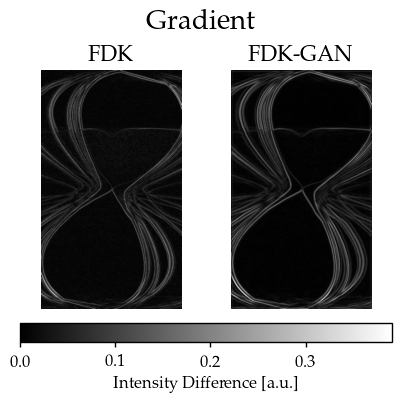

FDK
0.00012881527 0.3310091
FDK-GAN
0.00018370981 0.33626628

0.0004350273 0.3958549

0.0003597935 0.5767057


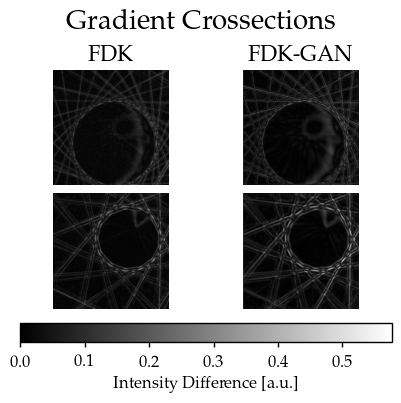

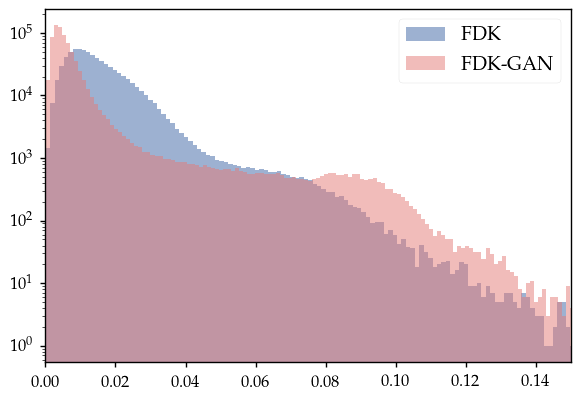

FDK
0.00036243288 0.12757222
FDK-GAN
0.000105865154 0.12844756


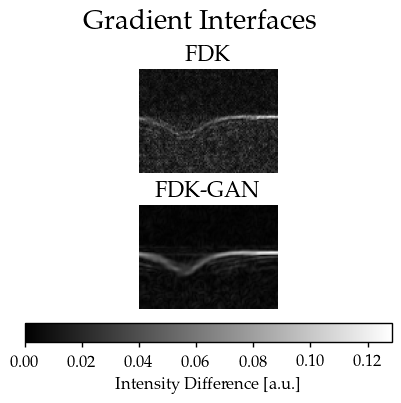

In [193]:
slice_norm = lambda x, ref: (x - np.min(ref)) / (np.max(ref) - np.min(ref))
volin = slice_norm(np.squeeze(crossections["13"]), np.squeeze(crossections["13"]))
volin_gan = slice_norm(np.squeeze(crossections["13_enhanced"]), np.squeeze(crossections["13_enhanced"]))


volin_grad = calc_gradient(volin)
volin_grad_gan = calc_gradient(volin_gan)

x1,x2, =0, 448
y1,y2 = 0, 264
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

plot_slice_grid([slin_grad, slgan_grad], ["FDK", "FDK-GAN"],
                bar=False,
    folder ="Hourglass4D",
    suptitle="Gradient",
    savefig=False,
    savefile="Hourglass4D_binned_gradient",
        cm="gray",
    fs=(1,1))

grad_grid = []

x1,x2, = 112, 113
y1,y2 = 0,264
z1,z2 = 0,264

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)

x1,x2, = 425, 426
y1,y2 = 0,264
z1,z2 = 0,264

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])

grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)


plot_slice_grid(grad_grid, ["FDK", "FDK-GAN", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle="Gradient Crossections",
    savefig=False,
    savefile="Hourglass4D_binned_gradient_crossections",
        cm="gray",
    fs=(1,1))

grad_grid = []

x1, x2 = 75, 150
y1,y2 = 100,200
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])


varin_grad = np.mean(slin_grad)
varin_grad_gan = np.mean(slgan_grad)

plt.hist(np.squeeze(volin_grad[x1:x2, y1:y2, y1:y2]).flatten(), bins=150, alpha=0.5, label="FDK")
plt.hist(np.squeeze(volin_grad_gan[x1:x2, y1:y2, y1:y2]).flatten(), bins=150, alpha=0.5, label="FDK-GAN")
plt.legend()
plt.yscale("log")
plt.xlim(0, 0.15)
plt.show()

grad_grid.append(slin_grad)
grad_grid.append(slgan_grad)

x1,x2, = 373, 448
y1,y2 = 75,175
z1,z2 = 158,159

slin_grad = np.squeeze(volin_grad[x1:x2, y1:y2, z1:z2])
slgan_grad = np.squeeze(volin_grad_gan[x1:x2, y1:y2, z1:z2])


# grad_grid.append(slin_grad)
# grad_grid.append(slgan_grad)


plot_slice_grid(grad_grid, ["FDK", "FDK-GAN", "", ""],
                bar=False,
    folder ="Hourglass4D",
    suptitle="Gradient Interfaces",
    savefig=False,
    savefile="Hourglass4D_binned_gradient_crossections",
    cm="gray",
    ns=(2,1),
    fs=(1,1))




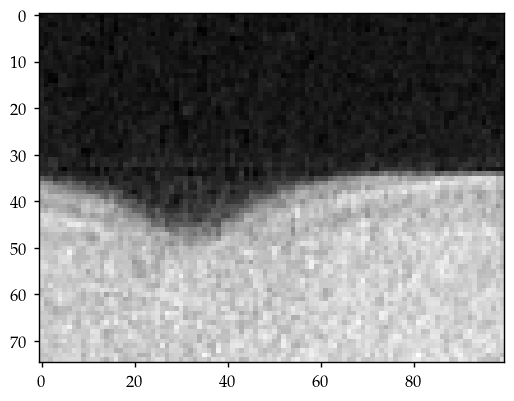

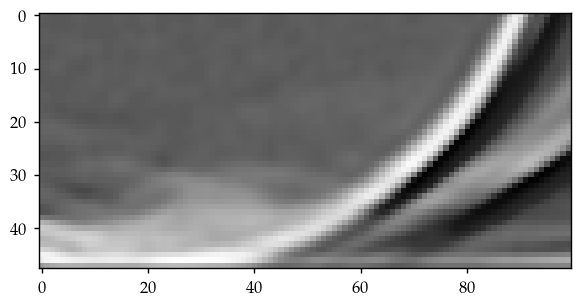

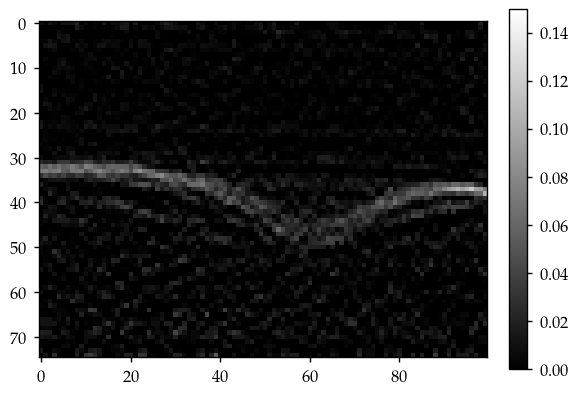

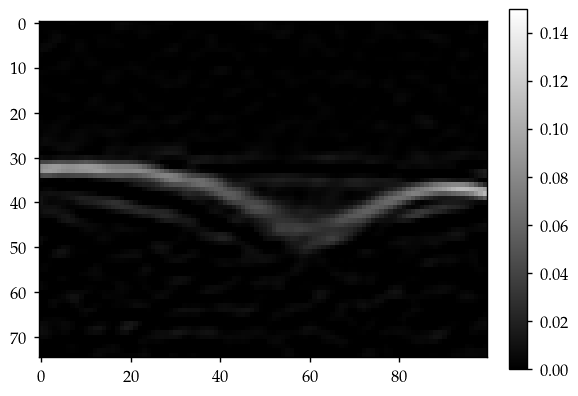

In [180]:




x1, x2 = 75, 150
y1, y2 = 100, 200
z1, z2 = 100, 200
plt.imshow(crossections["13"][75:150,100:200,158], cmap="gray")
plt.show()

plt.imshow(crossections["13_enhanced"][400:448,100:200,158], cmap="gray")
plt.show()

# plt.figure(projection="3d")
# X, Y = np.meshgrid(np.arange(75,150), np.arange(100,200))
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# ax.plot_surface(X, Y,crossections["13"][75:150,100:200,100:200], cmap="gray")
# plt.show()

slice_norm = lambda x, ref: (x - np.min(ref)) / (np.max(ref) - np.min(ref))
slin_norm = slice_norm(crossections["13"][75:150,128,100:200], crossections["13"])
slout_norm = slice_norm(crossections["13_enhanced"][75:150,128,100:200], crossections["13_enhanced"])

slin_grad = np.gradient(slin_norm)[0]
slout_grad = np.gradient(slout_norm)[0]

plt.imshow(slin_grad, cmap="gray", vmin=0, vmax=0.15)
plt.colorbar()
plt.show()

plt.imshow(slout_grad, cmap="gray", vmin=0, vmax=0.15)
plt.colorbar()
plt.show()


def calc_gradient(crossection):
    grad = np.gradient(crossection)
    grad_x = grad[0]
    grad_y = grad[1]
    grad_z = grad[2]
    return np.sqrt(grad_x**2 + grad_y**2 + grad_z**2)






In [ ]:
x1, x2 = 218, 666
y1, y2 = 124, 388
z1, z2 = 124, 388

slice = [[x1, x2], [y1, y2], [z1, z2]]

names = [
    "hourglassV3_13_55_2bin",
]

crossections = {
    # "favg6":  {"name": names[0] },
    # "favg12": { "name": names[1]},
    # "favg24": {"name": names[2]},
}

identifiers = [
    "gt",
    "Rec_54_1_fdk",
    "Rec_54_1_fdk_enhanced_442256256_complete", #RSD: Simulated or complete dataset?
]
keys = [
    "gt",
    "13",
    "13_enhanced",
]

# for k, v in crossections.items():
for j,(id,key) in enumerate(zip(identifiers, keys)):

    if key.endswith("enhanced"):
        x1, x2 = 0,448
        y1, y2 = 0,264
        z1, z2 = 0,264
    else:
        x1, x2 = 218, 666
        y1, y2 = 124, 388
        z1, z2 = 124, 388

    load_name = f"{names[0]}_{identifiers[j]}_{x1}_{x2}_{y1}_{y2}_{z1}_{z2}.npy"
    load_path = os.path.join(root, load_name)
    crossections[key]= np.squeeze(np.load(load_path))